## Import Libraries

In [6]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

## Load Dataset 

In [7]:
base_dir = os.getcwd()
file_path = os.path.normpath(os.path.join(base_dir, "../../", "Lecture 10/data_raw/bills_actions.csv"))

actions = pd.read_csv(file_path)


## Question 1

#### Give some basic descriptive statistics from the dataset. How many bills are there? What proportion of the bills belong to each category? What proportion of the bills belong to different types of actions within each category?

Since a bill (referenced by bill_number) might have multiple bill types (bill_type), possibly due to the bill changing over time, I will consider that a unique bill is given by the unique combination of bill_number and bill_type. 

In [8]:
# Creating a unique bill ID
actions['bill_id'] = actions['bill_number'].astype(str) + actions['bill_type']


In [80]:
# Count distinct number of bills 
num_bills = actions['bill_id'].nunique()
print("There are ", num_bills, " unique bills in the dataset.")


There are  1494  unique bills in the dataset.


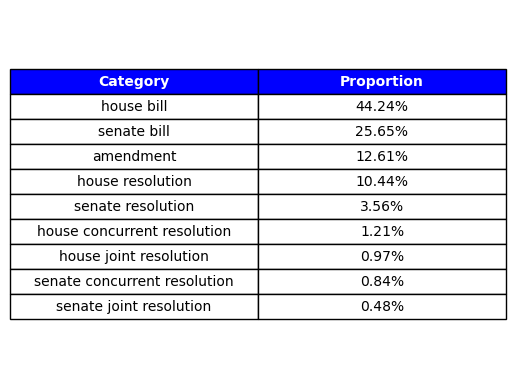

In [32]:
# Proportion of bills in each category

# Group into category and then count unique bill_id
unique_bills_by_category = actions.groupby('category')['bill_id'].nunique()

# Compute the proportion 
proportion_bills_by_category = (unique_bills_by_category/unique_bills_by_category.sum())*100

# Creating a table for display 

proportion_bills_table = pd.DataFrame({
    'Category': proportion_bills_by_category.index,
    'Proportion': proportion_bills_by_category.values
})

# Sort values for table 
proportion_bills_table = proportion_bills_table.sort_values(by = 'Proportion', ascending = False)

# Formatting to percentage 
proportion_bills_table['Proportion'] = proportion_bills_table['Proportion'].apply(lambda x: f'{x:.2f}%')


fig, ax = plt.subplots()

# Creating table
table = ax.table(cellText=proportion_bills_table.values, 
                 colLabels=proportion_bills_table.columns, 
                 cellLoc='center', 
                 loc='center')

# Formatting table 
for (i, j), cell in table.get_celld().items():
    if i == 0:  # Header row
        cell.set_facecolor('blue')  
        cell.set_text_props(color='white', weight='bold', fontsize=10)  
    else:  
        pass
    cell.set_edgecolor('black')  

ax.axis('tight')
ax.axis('off')

# Scale the table
table.scale(1, 1.5)

# Display the table
plt.show()

/var/folders/q1/01n67gwn27z65jnn2t76vm6w0000gn/T/ipykernel_66199/4210272858.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  proportion_bills_action_category = unique_bills_by_cat_action.groupby('category').apply(lambda x: x.assign(proportion=(x['bill_id'] / x['bill_id'].sum()) * 100))


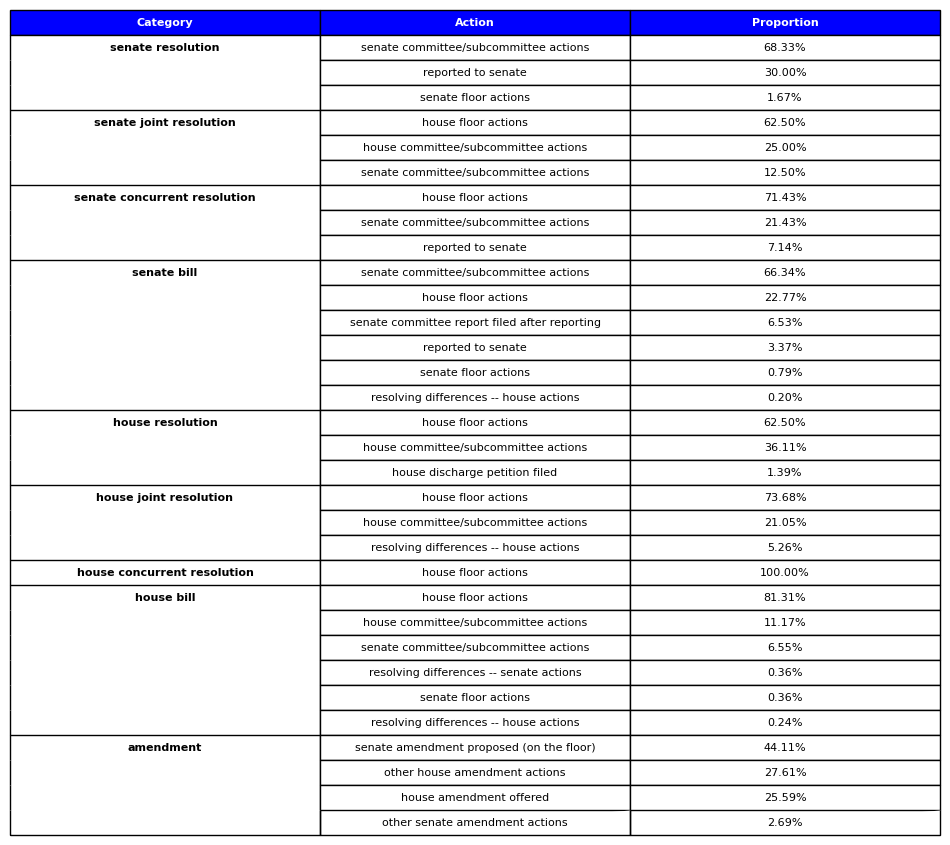

In [28]:
# Proportion of bills in each action within each category 

# Group by category and main_action then count unique bill_id
unique_bills_by_cat_action = actions.groupby(['category', 'main_action'])['bill_id'].nunique()
unique_bills_by_cat_action = unique_bills_by_cat_action.reset_index()

# Taking the bill count for each category and main_action combindation, then dividing by the sum of bill count in category 
proportion_bills_action_category = unique_bills_by_cat_action.groupby('category').apply(lambda x: x.assign(proportion=(x['bill_id'] / x['bill_id'].sum()) * 100))


# Creating a table for nice display 


# Creating a DataFrame for display in the table

proportion_bills_action_category_table = pd.DataFrame({
    'Category': proportion_bills_action_category['category'],
    'Action': proportion_bills_action_category['main_action'],
    'Proportion': proportion_bills_action_category['proportion']  
})


# Sorting the DataFrame by proportion for better display
proportion_bills_action_category_table = proportion_bills_action_category_table.sort_values(['Category','Proportion'], ascending=False)
proportion_bills_action_category_table['Category'] = proportion_bills_action_category_table['Category'].mask(proportion_bills_action_category_table['Category'].duplicated(), '')

# Format the proportion column as percentages
proportion_bills_action_category_table['Proportion'] = proportion_bills_action_category_table['Proportion'].apply(lambda x: f'{x:.2f}%')

# Displaying the table using matplotlib
fig, ax = plt.subplots(figsize=(8, 6))

# Creating the table for matplotlib
table = ax.table(cellText=proportion_bills_action_category_table.values,
                 colLabels=proportion_bills_action_category_table.columns,
                 cellLoc='center', loc='center')

# Hide axes
ax.axis('tight')
ax.axis('off')



# Format the table appearance
for (i, j), cell in table.get_celld().items():
    if i == 0:  
        cell.set_facecolor('blue')
        cell.set_text_props(color='white', weight='bold', fontsize=10)
        cell.set_edgecolor('black') 
        cell.visible_edges = 'closed'
    else:
        cell.set_edgecolor('black')
        if i == len(proportion_bills_action_category_table):
            cell.visible_edges = 'LRB'
        elif j == 0: 
            if proportion_bills_action_category_table['Category'].iloc[i - 1] == '':
                cell.visible_edges = 'LR' 
            else:
                cell.visible_edges = 'LRT'  
                cell.set_text_props(color='black', weight='bold', fontsize=10)


# Scale the table for better readability
table.scale(1.5, 1.5)

# Show the table
plt.show()


In [36]:
def create_tables(ax1, ax2, table1_data, table2_data):


    # Creating table 1
    table1 = ax1.table(cellText=table1_data.values, 
                    colLabels=table1_data.columns, 
                    cellLoc='center', 
                    loc='center')
    
    # Hide axes
    ax1.axis('tight')
    ax1.axis('off')

    # Formatting table 
    for (i, j), cell in table1.get_celld().items():
        if i == 0:  # Header row
            cell.set_facecolor('blue')  
            cell.set_text_props(color='white', weight='bold', fontsize=10)  
        else:  
            pass
        cell.set_edgecolor('black')  

    # Scale the table
    table1.scale(1, 1)


    # Creating table 2
    table2 = ax2.table(cellText=table2_data.values,
                    colLabels=table2_data.columns,
                    cellLoc='center', loc='center')

    # Hide axes
    ax2.axis('tight')
    ax2.axis('off')

    # Format the table appearance
    for (i, j), cell in table2.get_celld().items():
        if i == 0:  
            cell.set_facecolor('blue')
            cell.set_text_props(color='white', weight='bold', fontsize=10)
            cell.set_edgecolor('black') 
            cell.visible_edges = 'closed'
        else:
            cell.set_edgecolor('black')
            if i == len(table2_data):
                cell.visible_edges = 'LRB'
            elif j == 0: 
                if table2_data['Category'].iloc[i - 1] == '':
                    cell.visible_edges = 'LR' 
                else:
                    cell.visible_edges = 'LRT'  
                    cell.set_text_props(color='black', weight='bold', fontsize=10)

    # Scale the table for better readability
    table2.scale(1.5, 1.5)



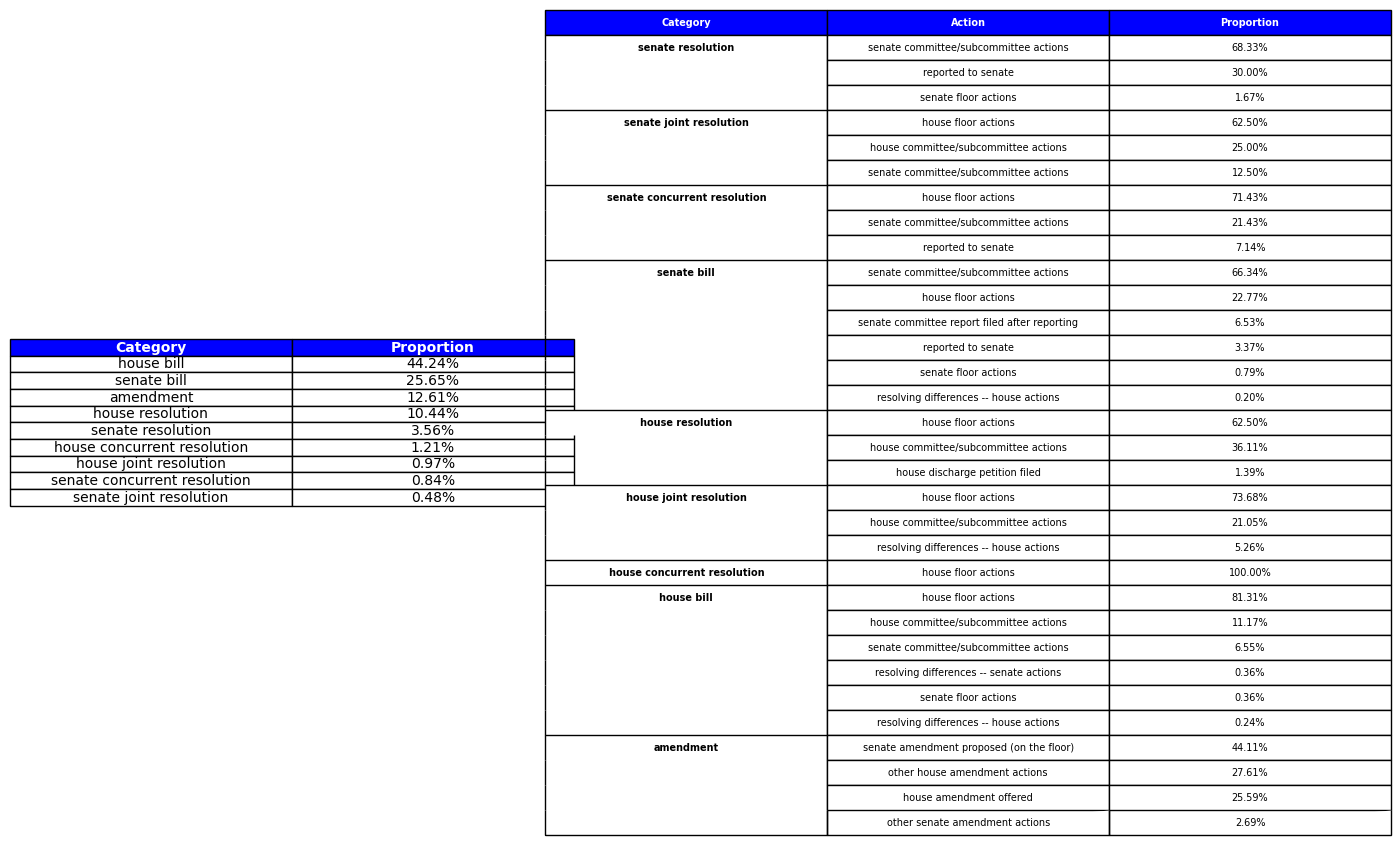

In [37]:
# Create a figure with two subplots (side by side)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Assume table1_data and table2_data are your dataframes
create_tables(ax1, ax2, proportion_bills_table, proportion_bills_action_category_table)

# Show the figure
plt.show()

##### Answers

When considering the unique bill_number and bill_type combination to represent a unique bill (represented by new variable bill_id), there are 1494  unique bills in the dataset.

## Question 2 

#### How many house floor actions are there as part of senate bills (category)?

In [30]:
# House floor actions as part of senate bills category 
house_floor_actions_in_senate_bills = actions[(actions['category'] == 'senate bill') & (actions['main_action'] == 'house floor actions')]
print(house_floor_actions_in_senate_bills.shape[0])


116


#### Answer
There are... 

#### 2a. What proportion of these actions were suspended? What proportion of these actions were suspended as amended?

In [ ]:
# Number of actions that were suspended
suspended_actions = house_floor_actions_in_senate_bills['action'].str.contains('suspend').sum()
suspended_as_amended_actions = house_floor_actions_in_senate_bills['action'].str.contains('suspend as amended', case=False).sum()


#### 2b. The house floor actions mention specific people mentioned by (Mr., Ms., Mrs.,etc). Use regular expressions to extract the name of specific people. Produce a new dataset counting how many bills mention the same person and extracting the names of the people mentioned. What is the distribution of total bills proposed per person?

First, I will check to see if there are any other titles used (other than Mr., Ms., Mrs.) in the dataset. I will assume that a title must start with a capital letter, followed either 1 or 2 lowercase letters, followed by a fullstop.

Looking at the data, it seems everyone is addressed by their last name in the "actions" column of the house_floor_actions_in_senate_bills dataframe. First, I want to see if there is anyone that might have a hyphenated last name. 
- Based on common titles in the U.S, I will assume that their title must start with a capital letter, followed either 1 or 2 lowercase letters, followed by a fullstop
- I will assume that there is a space after the title and that all last names start with a capital letter

In [47]:
# Looking through the "actions" column in the house_floor_actions_in_senate_bills dataframe to find titles followed
hyphen_lastname = house_floor_actions_in_senate_bills["action"].str.findall(r"[A-Z]{1}[a-z]{1,3}\.\s[A-Z]{1}[a-z]*\-")

# Appending to a list 
hyphen_list = []
for i in hyphen_lastname:
    for j in i:
        hyphen_list.append(j)

# Printing unique titles in list 
if len(hyphen_list) == 0:
    print("There are no hyphenated last names.")
else:
    print("There are hyphenated last names: ", set(hyphen_list))


There are no hyphenated last names.


Since there are no hpyhenated last names, I do not need to consider this. 

In [53]:
# Looking through actions to find a title following by a space followed by a capital letter, followed by any number of consecutive lowercase letters
people_search = house_floor_actions_in_senate_bills["action"].str.findall(r"[A-Z]{1}[a-z]{1,3}\.\s[A-Z]{1}[a-z]*")


# I want to ensure 
for i in people_search:
    if len(i)>1:
        print('There are multiple people referenced in action ', i)
    else:
        print(i)



['Ms. Lofgren']
['Mr. Evans']
['Mr. Clay']
['Ms. De']
['Mr. Larsen']
['Mrs. Luria']
['Ms. Kuster']
['Mr. Takano']
['Mr. Raskin']
['Mrs. Luria']
['Mr. Sherman']
['Mr. Gomez']
['Ms. Craig']
['Ms. Titus']
['Ms. Adams']
['Mr. De']
['Mr. De']
['Mr. Cicilline']
['Mr. Raskin']
['Mrs. Dingell']
['Mr. Connolly']
['Mr. Takano']
['Mr. Huffman']
['Mrs. Dingell']
['Mr. Case']
['Mr. Pallone']
['Mr. Cicilline']
['Ms. Horn']
['Mr. Sires']
['Mr. De']
['Mr. Pallone']
['Ms. Norton']
['Mr. Carbajal']
['Mr. Case']
['Ms. Scanlon']
['Mrs. Mc']
['Mr. Takano']
['Mr. Khanna']
['Mr. Peterson']
['Mrs. Luria']
['Mr. Huffman']
['Mr. Case']
['Mr. De']
['Ms. Stevens']
['Mr. Rouda']
['Mrs. Dingell']
['Ms. Jackson']
['Mr. Cicilline']
['Ms. Jackson']
['Ms. Eshoo']
['Mr. Mc']
['Mr. Pallone']
['Mr. Takano']
['Mr. Pallone']
['Mr. Engel']
['Mr. Case']
['Ms. Haaland']
['Ms. Torres']
['Mrs. Mc']
['Ms. Haaland']
['Mr. Takano']
['Mr. Neguse']
['Ms. Scanlon']
['Ms. Bass']
['Ms. Waters']
['Ms. Horn']
['Mr. Cummings']
['Mr. Cisner

In [ ]:
person_dataframe = house_floor_actions_in_senate_bills[['action',]]
